In [1]:
import numpy as np 
import pandas as pd

import os
dir_black = os.path.join('soil types\Black soil')
dir_Cinder = os.path.join('soil types\Cinder soil')
dir_Laterite = os.path.join('soil types\Laterite soil')
dir_peat = os.path.join('soil types\Peat soil')
dir_yellow = os.path.join('soil types\Yellow soil')

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
image_size = 220
batch_size = 10


target_size = (image_size, image_size)
input_shape = (image_size, image_size, 3)

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255)


train_generator = train_datagen.flow_from_directory(
        'soil types', 
        target_size=(200, 200),
        batch_size = batch_size,
        classes = [ 'Black Soil','Cinder Soil', 'Laterite Soil','Peat Soil','Yellow Soil'],
       class_mode='categorical')

Found 147 images belonging to 5 classes.


In [5]:
for image_batch, label_batch in train_generator:
  break
  image_batch.shape, label_batch.shape

In [6]:
print (train_generator.class_indices)

{'Black Soil': 0, 'Cinder Soil': 1, 'Laterite Soil': 2, 'Peat Soil': 3, 'Yellow Soil': 4}


In [7]:
model = tf.keras.models.Sequential([
    
    # The first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(220, 220, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    # Flatten the results to feed into a dense layer
    tf.keras.layers.Flatten(),
    # 128 neuron in the fully-connected layer
    tf.keras.layers.Dense(128, activation='relu'),
    # 5 output neurons for 5 classes with the softmax activation
    tf.keras.layers.Dense(5, activation='softmax')
])

C:\Users\gsuma\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 218, 218, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 109, 109, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 107, 107, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 53, 53, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 51, 51, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 25, 25, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 23, 23, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 11, 11, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 9, 9, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 229,285 (895.64 KB)

 Trainable params: 229,285 (895.64 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['acc'])

In [10]:
total_sample = train_generator.n
n_epochs = 30

In [11]:
history = model.fit(
        train_generator, 
        steps_per_epoch = int(total_sample/batch_size),  
        epochs = n_epochs,
        verbose = 1)

Epoch 1/30


C:\Users\gsuma\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 79ms/step - acc: 0.1540 - loss: 1.6267
Epoch 2/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.2000 - loss: 0.8021 
Epoch 3/30


c:\Program Files\Python311\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - acc: 0.3460 - loss: 1.4931
Epoch 4/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 463us/step - acc: 0.1000 - loss: 0.8132
Epoch 5/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - acc: 0.4467 - loss: 1.1919
Epoch 6/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step - acc: 0.5000 - loss: 0.6183
Epoch 7/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - acc: 0.4074 - loss: 1.0586
Epoch 8/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step - acc: 0.3000 - loss: 0.5115
Epoch 9/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - acc: 0.4866 - loss: 1.0088
Epoch 10/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - acc: 0.6000 - loss: 0.6860 
Epoch 11/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - acc: 0.5286 - loss: 0.9436
Epoch 12/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 460us/step - acc: 0.4286 - loss: 0.4916
Epoch 13/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - acc: 0.4920 - loss: 0.9978
Epoch 14/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - acc: 0.6000 - loss: 0.3858  
Epoch 15/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 

In [12]:
model.save('soil_analysis.h5')

In [13]:
import tensorflow as tf
from tensorflow import keras
model = tf.keras.models.load_model('soil_analysis.h5')


In [ ]:
classes = [ 'Black Soil','Cinder Soil', 'Laterite Soil','Peat Soil','Yellow Soil']

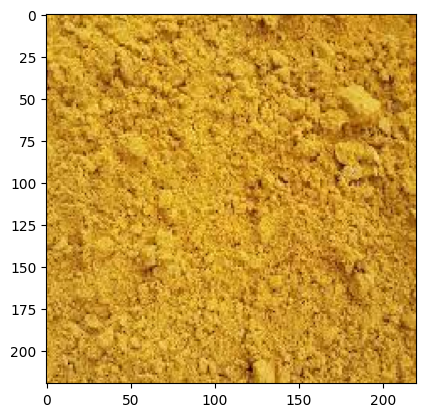

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
[[0. 0. 0. 0. 1.]]
Yellow Soil


In [18]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
dir_path = "soil types/Yellow soil/2.jpg"

classes = [ 'Black Soil','Cinder Soil', 'Laterite Soil','Peat Soil','Yellow Soil']

img= image.load_img(dir_path, target_size =(220,220,3))
plt.imshow(img)
plt.show()
    
x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)
images = np.vstack([x])
    
val = model.predict(images)
print(val)
for i in range (len(classes)):
  if val[0][i] == 1:
    x = i
    print(classes[i])


